# TBOX Generation

In [1]:
#import rdflib
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import DC, RDF, FOAF, RDFS, XSD #import already in RDFlib integrated namespaces 
#for visualization
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from rdflib import Graph, Namespace, RDF, RDFS, URIRef

We define the namespaces and create the graph:

In [2]:

# For Classes and properties 
DBO = Namespace("http://dbpedia.org/ontology/")
# For instances
DBR = Namespace("http://dbpedia.org/resource/")
# For Custom properties or resources defined locally
EX = Namespace("http://example.org/")

g = Graph()

Defining the classes with schema-level triples:

In [3]:
g.add((DBO.Author, RDF.type, RDFS.Class))
g.add((DBO.Paper, RDF.type, RDFS.Class))

g.add((DBO.Conference, RDF.type, RDFS.Class))
g.add((DBO.ConferenceEdition, RDF.type, RDFS.Class))
g.add((DBO.Workshop, RDF.type, RDFS.Class))
g.add((DBO.WorkshopEdition, RDF.type, RDFS.Class))
g.add((DBO.EventEdition, RDF.type, RDFS.Class))

g.add((DBO.Journal, RDF.type, RDFS.Class))
g.add((DBO.JournalVolume, RDF.type, RDFS.Class))

g.add((DBO.Reviewer, RDF.type, RDFS.Class))
g.add((DBO.Review, RDF.type, RDFS.Class))
g.add((DBO.ConferenceChair, RDF.type, RDFS.Class))
g.add((DBO.JournalEditor, RDF.type, RDFS.Class))
g.add((DBO.Person, RDF.type, RDFS.Class))
g.add((DBO.Coordinator, RDF.type, RDFS.Class))

g.add((DBO.City, RDF.type, RDFS.Class))
g.add((DBO.Year, RDF.type, RDFS.Class))
g.add((DBO.Keyword, RDF.type, RDFS.Class))

<Graph identifier=Nf57dba85194d4447808b8e0a6be6d96c (<class 'rdflib.graph.Graph'>)>

Now the properties:

In [4]:
# Paper -iswritten-> Author
g.add((DBO.iswritten, RDF.type, RDF.Property))
g.add((DBO.iswritten, RDFS.domain, DBO.Paper))
g.add((DBO.iswritten, RDFS.range, DBO.Author))
# Paper -is_corresponding_author-> Author
g.add((DBO.is_corresponding_author, RDF.type, RDF.Property))
g.add((DBO.is_corresponding_author, RDFS.range, DBO.Author))
g.add((DBO.is_corresponding_author, RDFS.domain, DBO.Paper))
# Paper -presentedAt-> EventEdition
g.add((DBO.presentedAt , RDF.type, RDF.Property))
g.add((DBO.presentedAt , RDFS.domain, DBO.Paper))
g.add((DBO.presentedAt , RDFS.range, DBO.EventEdition))
# Paper -published_in-> JournalVolume
g.add((DBO.published_in , RDF.type, RDF.Property))
g.add((DBO.published_in , RDFS.domain, DBO.Paper))
g.add((DBO.published_in , RDFS.range, DBO.JournalVolume))
# ConferenceEdition -is_edition_of-> Conference
g.add((DBO.is_edition_of , RDF.type, RDF.Property))
g.add((DBO.is_edition_of , RDFS.domain, DBO.ConferenceEdition))
g.add((DBO.is_edition_of , RDFS.range, DBO.Conference))
# WorkshopEdition -is_edition_of-> Workshop
g.add((DBO.is_edition_of , RDF.type, RDF.Property))
g.add((DBO.is_edition_of , RDFS.domain, DBO.WorkshopEdition))
g.add((DBO.is_edition_of , RDFS.range, DBO.Workshop))
# EventEdition -held_in_city-> City
g.add((DBO.held_in_city , RDF.type, RDF.Property))
g.add((DBO.held_in_city , RDFS.domain, DBO.EventEdition))
g.add((DBO.held_in_city , RDFS.range, DBO.City))
# EventEdition -held_in_year-> Year
g.add((DBO.held_in_year , RDF.type, RDF.Property))
g.add((DBO.held_in_year , RDFS.domain, DBO.EventEdition))
g.add((DBO.held_in_year , RDFS.range, DBO.Year))
# JournalVolume -is_volume_of-> Journal
g.add((DBO.is_volume_of , RDF.type, RDF.Property))
g.add((DBO.is_volume_of , RDFS.domain, DBO.JournalVolume))
g.add((DBO.is_volume_of , RDFS.range, DBO.Journal))
# JournalVolume -of_year-> Year
g.add((DBO.of_year , RDF.type, RDF.Property))
g.add((DBO.of_year , RDFS.domain, DBO.JournalVolume))
g.add((DBO.of_year , RDFS.range, DBO.Year))
# Paper -cites-> Paper
g.add((DBO.cites, RDF.type, RDF.Property))
g.add((DBO.cites, RDFS.domain, DBO.Paper))
g.add((DBO.cites, RDFS.range, DBO.Paper))
# Paper -is_about-> Keyword
g.add((DBO.is_about, RDF.type, RDF.Property))
g.add((DBO.is_about, RDFS.domain, DBO.Paper))
g.add((DBO.is_about, RDFS.range, DBO.Keyword))
# ConferenceChair -organizes-> Conference
g.add((DBO.organizes, RDF.type, RDF.Property))
g.add((DBO.organizes, RDFS.domain, DBO.ConferenceChair))
g.add((DBO.organizes, RDFS.range, DBO.Conference))
# JournalEditor -edits-> Journal
g.add((DBO.edits, RDF.type, RDF.Property))
g.add((DBO.edits, RDFS.domain, DBO.JournalEditor))
g.add((DBO.edits, RDFS.range, DBO.Journal))
# Review -is_assigned_by-> Coordinator
g.add((DBO.is_assigned_by, RDF.type, RDF.Property))
g.add((DBO.is_assigned_by, RDFS.domain, DBO.Review))
g.add((DBO.is_assigned_by, RDFS.range, DBO.Coordinator))
# Review -review_written_by-> Reviewer
g.add((DBO.review_written_by, RDF.type, RDF.Property))
g.add((DBO.review_written_by, RDFS.domain, DBO.Review))
g.add((DBO.review_written_by, RDFS.range, DBO.Reviewer))
# Review -corresponds_to_paper-> Paper
g.add((DBO.corresponds_to_paper, RDF.type, RDF.Property))
g.add((DBO.corresponds_to_paper, RDFS.domain, DBO.Review))
g.add((DBO.corresponds_to_paper, RDFS.range, DBO.Paper))  

<Graph identifier=Nf57dba85194d4447808b8e0a6be6d96c (<class 'rdflib.graph.Graph'>)>

Next the subproperties and subclasses:

In [ ]:
# is_corresponding_author -subPropertyOf-> iswritten
g.add((DBO.is_corresponding_author, RDFS.subPropertyOf, DBO.iswritten))
# Author -subClassOf-> Person
g.add((DBO.Author, RDFS.subClassOf, DBO.Person))
# Reviewer -subClassOf-> Author
g.add((DBO.Reviewer, RDFS.subClassOf, DBO.Author))
# Coordinator-subClassOf-> Person
g.add((DBO.Coordinator, RDFS.subClassOf, DBO.Person))
# ConferenceChair-subClassOf-> Coordinator
g.add((DBO.ConferenceChair, RDFS.subClassOf, DBO.Coordinator))
# JournalEditor-subClassOf-> Coordinator
g.add((DBO.JournalEditor, RDFS.subClassOf, DBO.Coordinator))
# ConferenceEdition -subClassOf-> EventEdition
g.add((DBO.ConferenceEdition, RDFS.subClassOf, DBO.EventEdition))
# WorkshopEdition -subClassOf-> EventEdition
g.add((DBO.WorkshopEdition, RDFS.subClassOf, DBO.EventEdition))

<Graph identifier=Nf57dba85194d4447808b8e0a6be6d96c (<class 'rdflib.graph.Graph'>)>

Now we can visualize the graph with a helper function:


(process:13424): Pango-WARNING **: 17:48:49.844: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(process:13424): Pango-WARNING **: 17:48:49.854: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



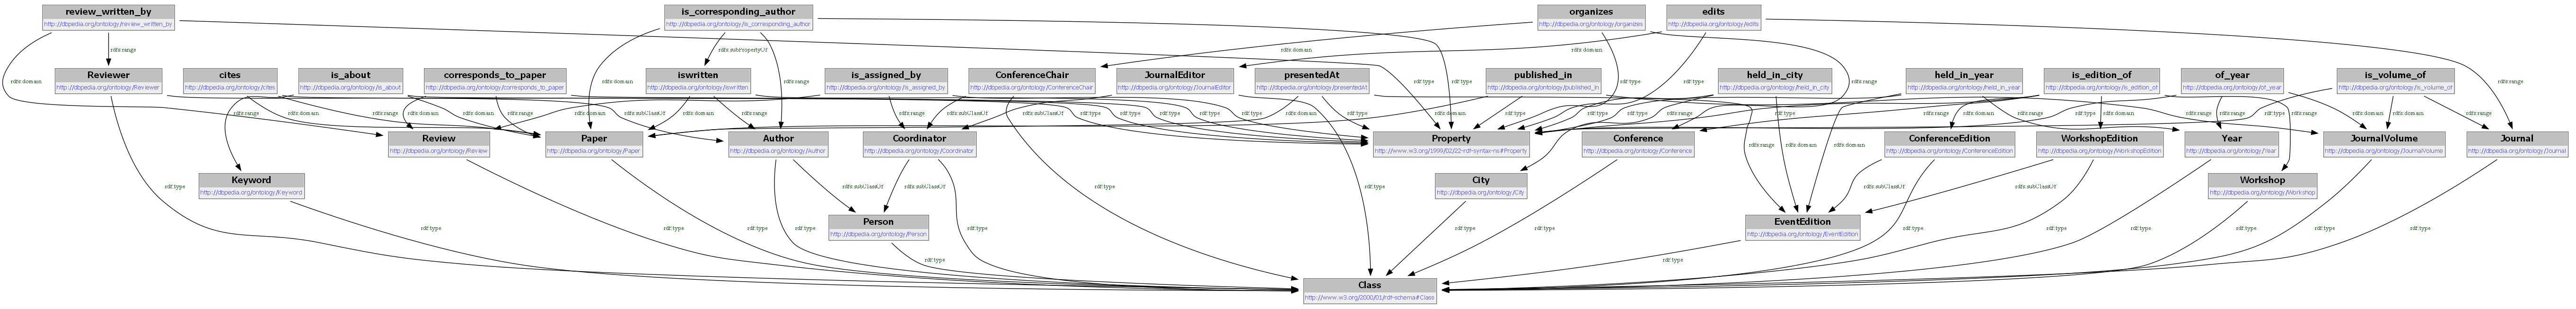

In [6]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png)) 

visualize(g)

We can also save the file and print the graph triplets:

In [13]:
g.serialize("output_files/tbox.ttl", format="turtle")
print(g.serialize(format="turtle"))

@prefix ns1: <http://dbpedia.org/ontology/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ns1:Author a rdfs:Class ;
    rdfs:subClassOf ns1:Person .

ns1:City a rdfs:Class .

ns1:Conference a rdfs:Class .

ns1:ConferenceChair a rdfs:Class ;
    rdfs:subClassOf ns1:Coordinator .

ns1:ConferenceEdition a rdfs:Class ;
    rdfs:subClassOf ns1:EventEdition .

ns1:Coordinator a rdfs:Class ;
    rdfs:subClassOf ns1:Person .

ns1:EventEdition a rdfs:Class .

ns1:Journal a rdfs:Class .

ns1:JournalEditor a rdfs:Class ;
    rdfs:subClassOf ns1:Coordinator .

ns1:JournalVolume a rdfs:Class .

ns1:Keyword a rdfs:Class .

ns1:Paper a rdfs:Class .

ns1:Person a rdfs:Class .

ns1:Review a rdfs:Class .

ns1:Reviewer a rdfs:Class ;
    rdfs:subClassOf ns1:Author .

ns1:Workshop a rdfs:Class .

ns1:WorkshopEdition a rdfs:Class ;
    rdfs:subClassOf ns1:EventEdition .

ns1:Year a rdfs:Class .

ns1:cites a rdf:Property ;
    rdfs:do

Other visualization option:

In [11]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()

for s, p, o in g:
    print(s)
    print(p)
    print(o)
    break
    G.add_edge(str(s), str(o), label=str(p))

nx.write_graphml(G, "graph.graphml")

http://dbpedia.org/ontology/iswritten
http://www.w3.org/2000/01/rdf-schema#domain
http://dbpedia.org/ontology/Paper


C:\Users\stef4\AppData\Local\Temp\ipykernel_16752\2681795363.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


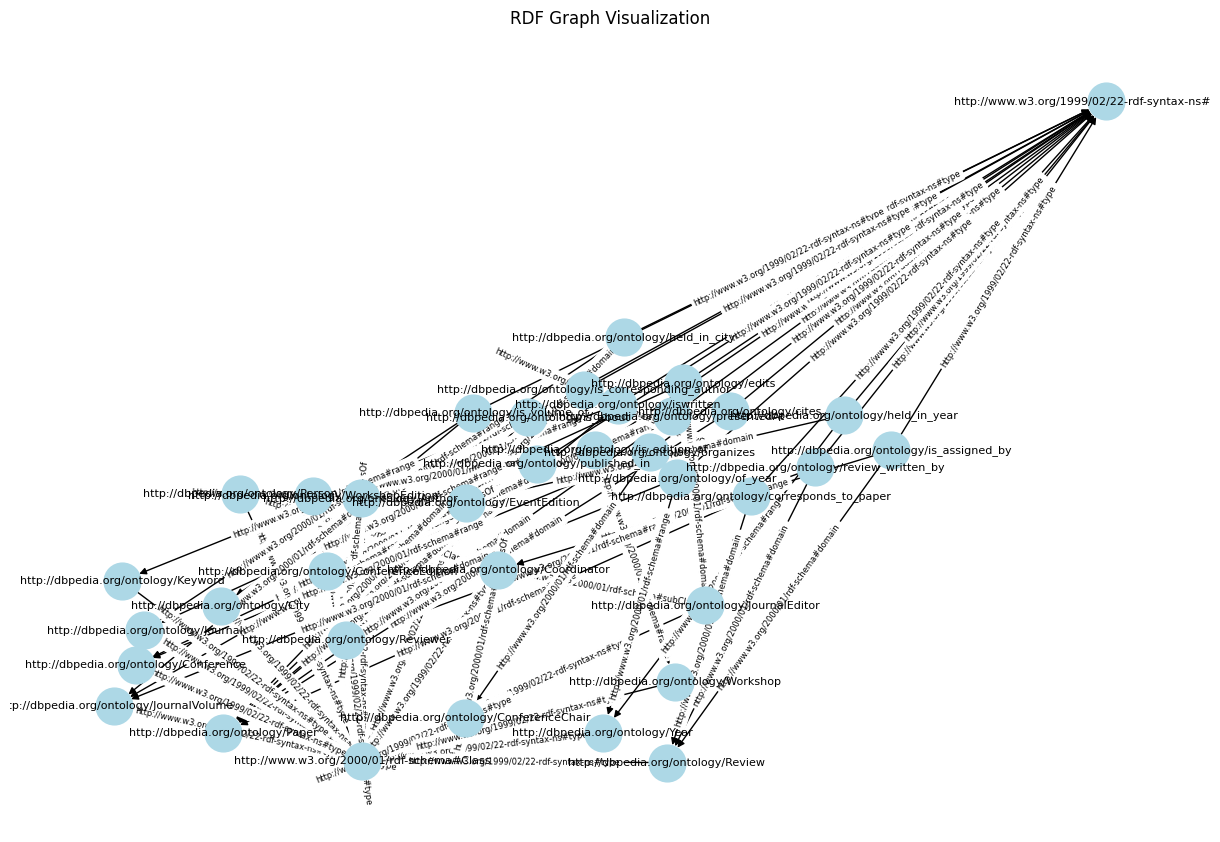

In [9]:
# Set layout
pos = nx.spring_layout(G, k=0.5, iterations=50)  # k controls spacing

# Draw nodes and edges
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=8, arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("RDF Graph Visualization")
plt.axis("off")
plt.tight_layout()
plt.show()